In [1]:
from sklearn.datasets import make_classification


In [2]:
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)


In [3]:
X.shape


(1000, 5)

In [4]:
Y.shape


(1000,)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train.shape, Y_train.shape


((800, 5), (800,))

In [6]:
X_test.shape, Y_test.shape


((200, 5), (200,))

In [7]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [21]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", 
          "Decision_Tree",  "Random_Forest", "MLP",
         "Naive_Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB()
]


In [22]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

In [23]:
import pandas as pd
import seaborn as sns

In [24]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.830
1,Linear_SVM,0.815
2,Polynomial_SVM,0.770
3,Decision_Tree,0.825
4,Random_Forest,0.825
5,MLP,0.840
6,Naive_Bayes,0.820


In [25]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.830000
1,Linear_SVM,0.815000
2,Polynomial_SVM,0.770000
3,Decision_Tree,0.825000
4,Random_Forest,0.825000
5,MLP,0.840000
6,Naive_Bayes,0.820000


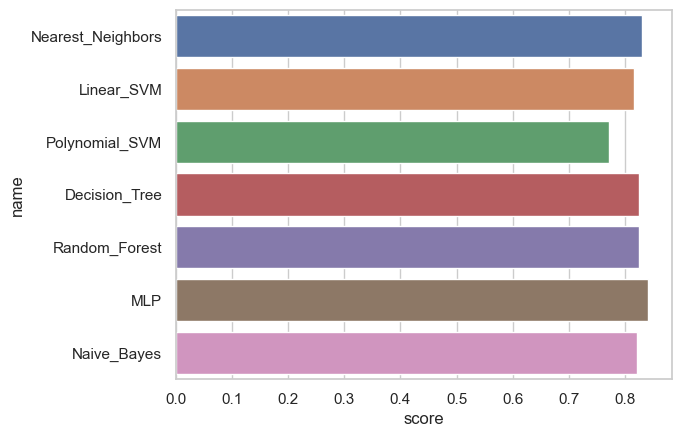

In [26]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)